<a href="https://colab.research.google.com/github/Abhishek92kumar/LJMU/blob/main/exploring_PubLayNet_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PubLayNet Dataset

PubLayNet is a large dataset of document images from PubMed Central Open Access Subset. Each document’s layout is annotated with both bounding boxes and polygonal segmentations.

The dataset is open sourced by IBM Research Australia and is [available to download freely](https://developer.ibm.com/exchanges/data/all/publaynet/) on the IBM Developer [Data Asset Exchange](http://ibm.biz/data-exchange). 

This notebook can be found on [GitHub](https://github.com/ibm-aur-nlp/PubLayNet) and [Watson Studio](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/43cb95d9-6c3e-479c-a189-8c9ff3524ec1/view?access_token=bb8ce645cf114b5f5512ae2eb9c7badcf0927f313e8f76b8138d0701289484e6).

## Download and Extract the Dataset

Since the dataset is huge (~100GB), here we will be downloading a small subset of the data and extract it. 

In [741]:
# importing prerequisites
import sys
import requests
import tarfile
import json
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [742]:
fname = 'examples.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

6461141

In [743]:
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()

In [744]:
# Verifying the file was extracted properly
data_path = "examples/"
path.exists(data_path)

True

## Visualizing the Data

In this section, we visualize the annotations file by overlaying it on the underlying image.

In [753]:
# Define color code
colors = {'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}

In [754]:
# Function to viz the annotation
def markup(image, annotations):
    ''' Draws the segmentation, bounding box, and label of each annotation
    '''
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        # Draw segmentation
        draw.polygon(annotation['segmentation'][0],
                     fill=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (64,))
        # Draw bbox
        draw.rectangle(
            (annotation['bbox'][0],
             annotation['bbox'][1],
             annotation['bbox'][0] + annotation['bbox'][2],
             annotation['bbox'][1] + annotation['bbox'][3]),
            outline=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (255,),
            width=2
        )
        # Draw label
        w, h = draw.textsize(text=samples['categories'][annotation['category_id'] - 1]['name'],
                             font=font)
        if annotation['bbox'][3] < h:
            draw.rectangle(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + annotation['bbox'][2] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
        else:
            draw.rectangle(
                (annotation['bbox'][0],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
    return np.array(image)

In [755]:
# Parse the JSON file and read all the images and labels
with open('examples/samples.json', 'r') as fp:
    samples = json.load(fp)
# Index images
images = {}
for image in samples['images']:
    images[image['id']] = {'file_name': "examples/" + image['file_name'], 'annotations': []}
for ann in samples['annotations']:
    images[ann['image_id']]['annotations'].append(ann)

In [756]:
# image = '/content/examples/PMC3576793_00004.jpg'


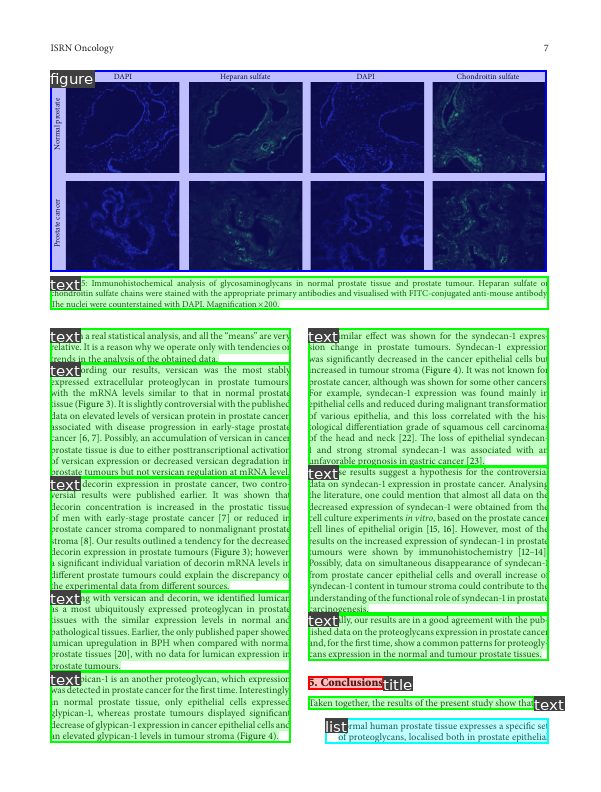

In [757]:
img

In [758]:
# image['annotations']
# /content/examples/PMC4954804_00001.jpg

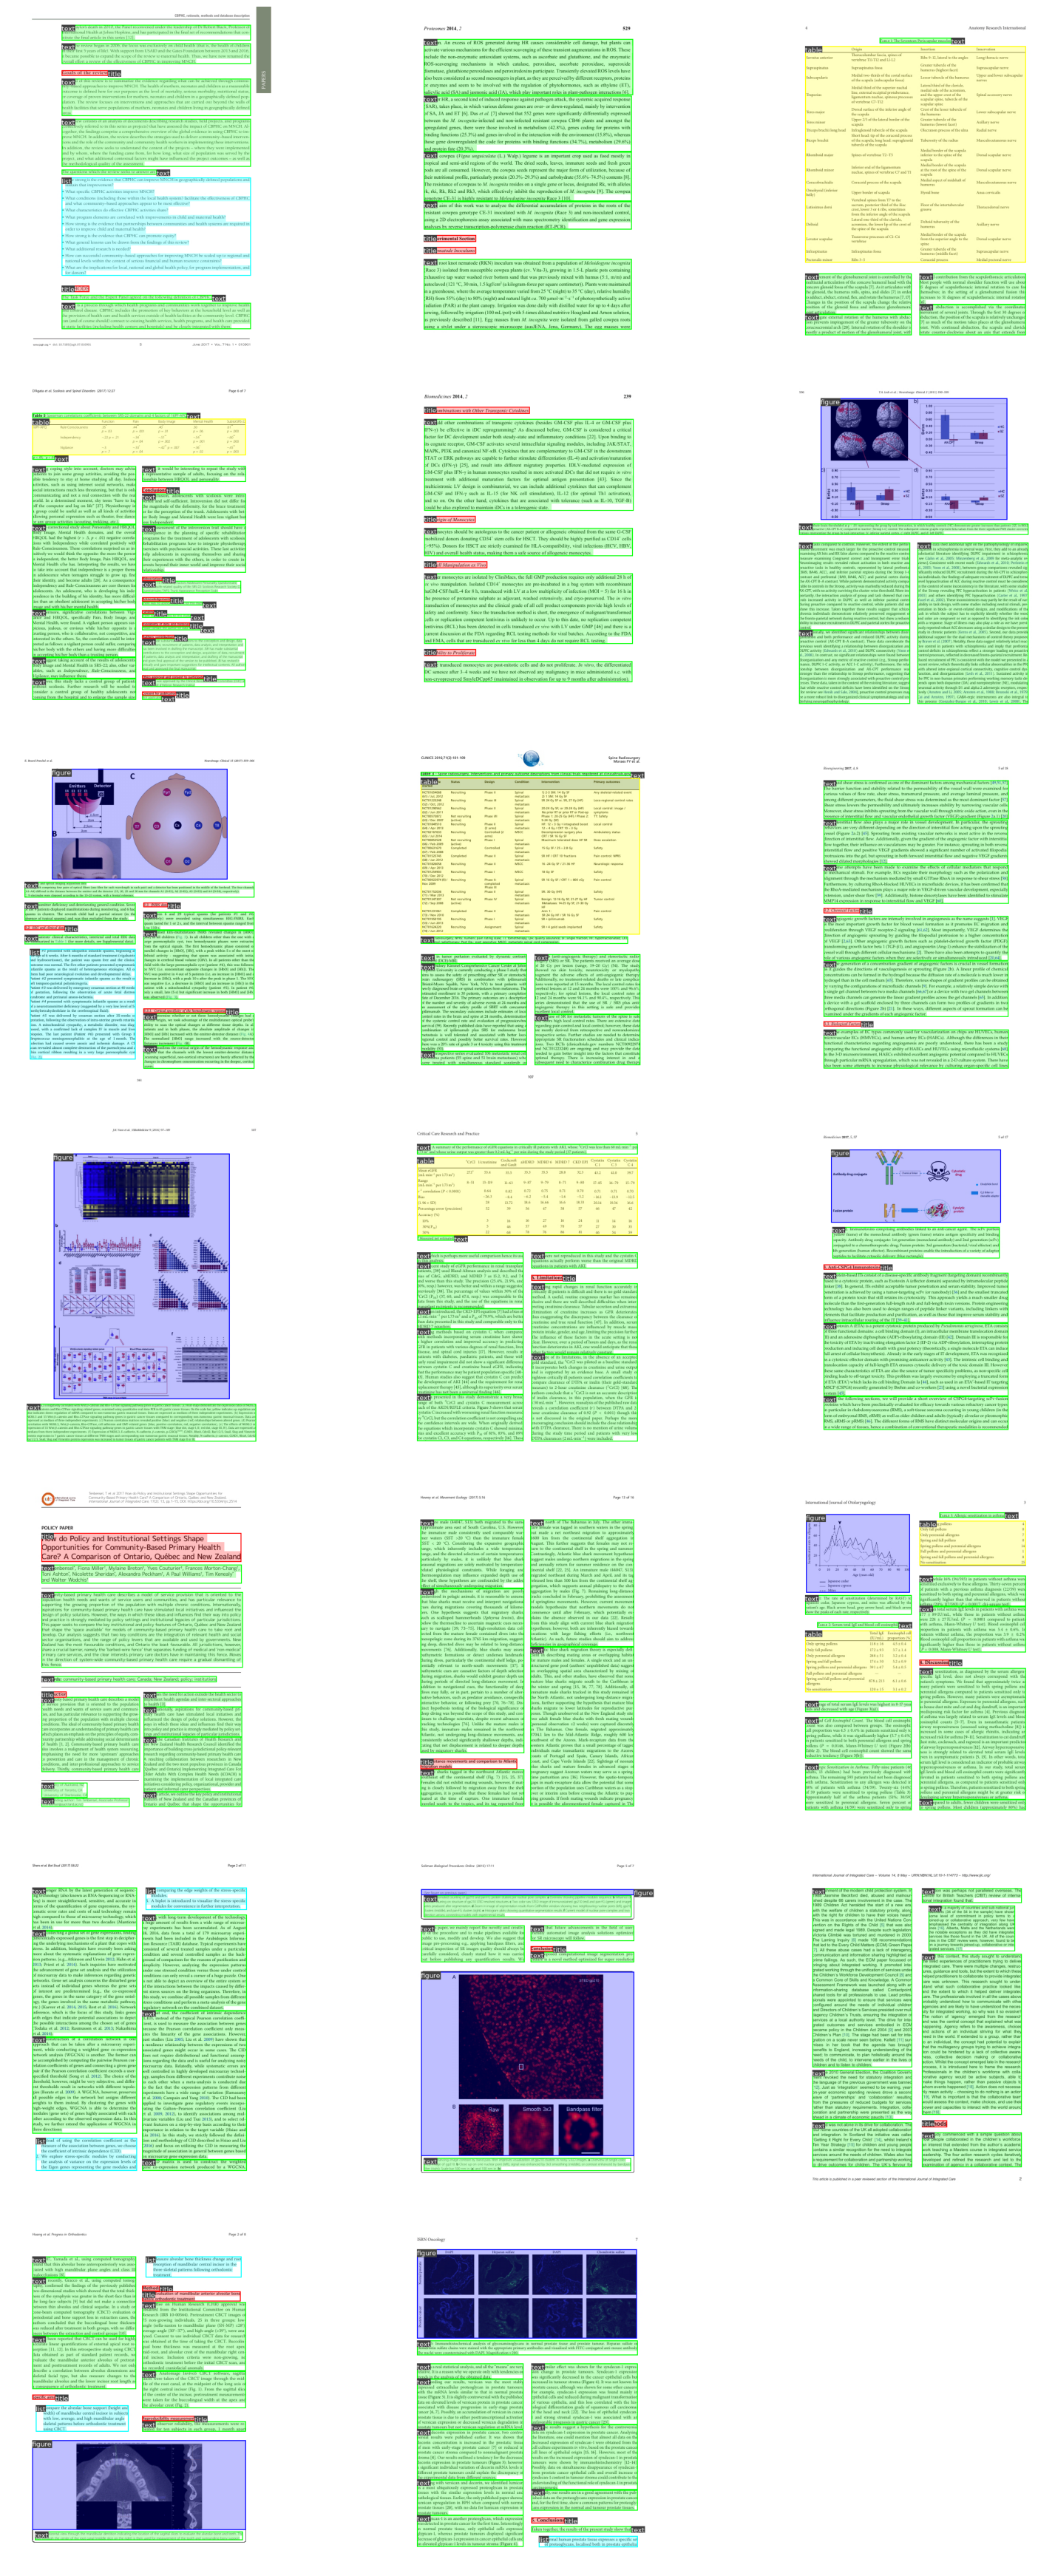

In [759]:
# Visualize annotations
font = ImageFont.truetype("examples/DejaVuSans.ttf", 15)
fig=plt.figure(figsize=(16, 100)) 
for i, (_, image) in enumerate(images.items()):
    with Image.open(image['file_name']) as img:
        ax = plt.subplot(len(images), 3, i + 1)
        ax.imshow(markup(img, image['annotations']))
        ax.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)

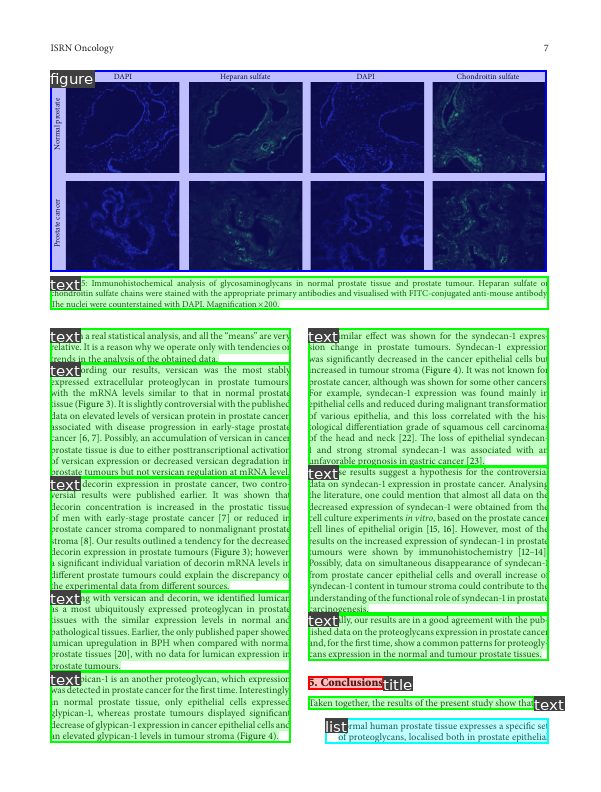

In [760]:
img

In [761]:
images.items()

dict_items([(348952, {'file_name': 'examples/PMC5491943_00004.jpg', 'annotations': [{'segmentation': [[121.89, 41.8, 549.88, 41.8, 549.88, 52.31, 547.09, 52.31, 547.09, 64.31, 287.15, 64.31, 287.15, 76.3, 121.89, 76.3, 121.89, 65.8, 121.89, 65.8, 121.89, 53.8, 121.89, 41.8]], 'area': 11581.494498000131, 'iscrowd': 0, 'image_id': 348952, 'bbox': [121.89, 41.8, 427.99, 34.5], 'category_id': 1, 'id': 3398552}, {'segmentation': [[121.89, 83.47, 549.83, 83.47, 549.83, 93.97, 549.44, 93.97, 549.44, 107.46, 549.8, 107.46, 549.8, 117.97, 425.74, 117.97, 425.74, 129.97, 121.89, 129.97, 121.89, 119.46, 121.89, 107.46, 121.89, 95.47, 121.89, 83.47]], 'area': 18405.733143000223, 'iscrowd': 0, 'image_id': 348952, 'bbox': [121.89, 83.47, 427.94, 46.5], 'category_id': 1, 'id': 3398553}, {'segmentation': [[121.89, 163.31, 547.09, 163.31, 547.09, 175.51, 549.74, 175.51, 549.74, 187.71, 549.84, 187.71, 549.84, 198.22, 547.09, 198.22, 547.09, 212.1, 549.97, 212.1, 549.97, 222.61, 549.86, 222.61, 549.86, 

In [764]:
# img=Image.open(['/content/examples/PMC3777717_00006.jpg'])
# 

In [765]:
# image['file_name']

# examples/PMC4972521_00010.jpg

# Exploring the training dataset

In [ ]:
!pip install webdataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import webdataset as wds
import pprint
import numpy as np
from itertools import islice
import torch
pp = pprint.PrettyPrinter(indent=2, compact=True, width=150, depth=2).pprint
cache_dir = None

### Loading PubLayNet from the Web

Datasets are accessible directly over the web. However, you can also store them locally, in network file systems, or in any object store.

In [ ]:
urls =  "https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/labels.tar.gz"
# urls =  "https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/publaynet.tar.gz"
# urls =  "https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/train-0.tar.gz"

Datasets are just `.tar` archives containing training files. For PubLayNet, each training sample consists of a `.png` file and a corresponding `.json` file.

In [ ]:
!curl {urls} | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313M  100  313M    0     0  10.6M      0  0:00:29  0:00:29 --:--:-- 11.0M


In [ ]:
import json
# f = open('/content/publaynet/train.json',)
f = open('examples/samples.json',)

# thing_classes  = []
# category_name_to_id = {}
# id_to_category_name ={}
# data_annotations=[]
data = json.load(f)
# for i in data['categories']:
#     thing_classes.append(i['name'])
#     print(i)
    # category_name_to_id[i['name']]=i['id']
    # id_to_category_name.append(i['id'])
    # id_to_category_name[i['id']= i['name']]
f.close()

In [ ]:
thing_classes  = []
category_name_to_id = {}
id_num =[]
id_to_category_name ={}
data_annotations=[]
for i in data['categories']:
    thing_classes.append(i['name'])
    category_name_to_id[i['name']]=i['id']
print(category_name_to_id)
print(thing_classes)

{'text': 1, 'title': 2, 'list': 3, 'table': 4, 'figure': 5}
['text', 'title', 'list', 'table', 'figure']


In [ ]:
id_to_category_name = {v: k for k, v in category_name_to_id.items()}
id_to_category_name

{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}

In [ ]:
category  = []
category_name_to_id = {}
data_annotations=[]

for i in data['annotations']:
    category.append(id_to_category_name[i['category_id']] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# category

In [ ]:
category_name_to_id = {}


In [ ]:
len(category)

193

In [ ]:
import pandas as pd
category =pd.Index(category)
category.value_counts()


text      137
title      34
figure      9
list        7
table       6
dtype: int64

<Axes: >

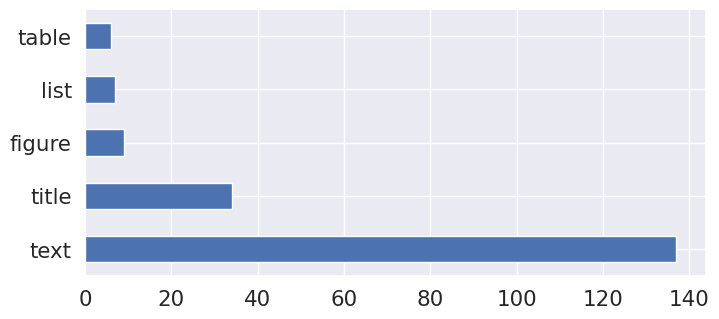

In [ ]:
category.value_counts().plot(kind='barh')


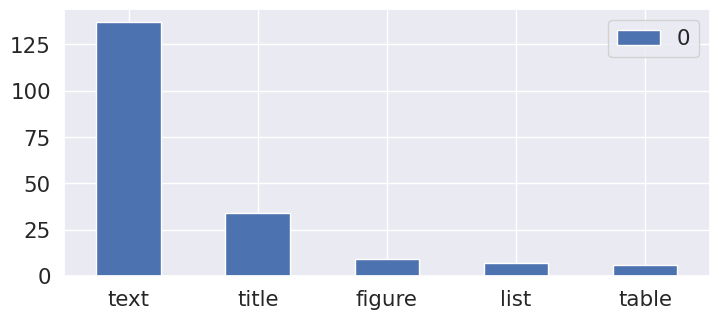

In [ ]:
df = pd.DataFrame(category.value_counts())
ax = df.plot.bar(rot=0)

(Text(0.5, 1.08, 'Instance Class Distribution (Training set)'),)

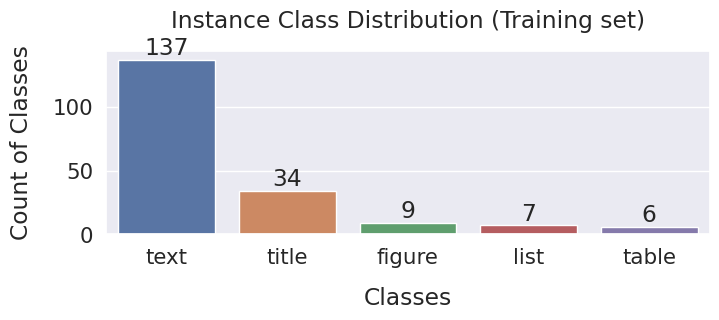

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)

ax =sns.barplot(x=category.value_counts().index, y=category.value_counts())
plt.ylabel("Count of Classes", labelpad=14)
plt.xlabel("Classes", labelpad=14)
plt.ticklabel_format(style='plain', axis='y')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])

plt.title('Instance Class Distribution (Training set)', y=1.08),

# Exploring the testing dataset

### Loading validation PubLayNet

In [ ]:
import json
f = open('/content/publaynet/val.json',)
# f = open('examples/samples.json',)

# thing_classes  = []
# category_name_to_id = {}
# id_to_category_name ={}
# data_annotations=[]
data = json.load(f)
# for i in data['categories']:
#     thing_classes.append(i['name'])
#     print(i)
    # category_name_to_id[i['name']]=i['id']
    # id_to_category_name.append(i['id'])
    # id_to_category_name[i['id']= i['name']]
f.close()

In [ ]:
thing_classes  = []
category_name_to_id = {}
id_num =[]
id_to_category_name ={}
data_annotations=[]
for i in data['categories']:
    thing_classes.append(i['name'])
    category_name_to_id[i['name']]=i['id']
print(category_name_to_id)
print(thing_classes)

{'text': 1, 'title': 2, 'list': 3, 'table': 4, 'figure': 5}
['text', 'title', 'list', 'table', 'figure']


In [ ]:
id_to_category_name = {v: k for k, v in category_name_to_id.items()}
id_to_category_name

{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}

In [ ]:
category  = []
category_name_to_id = {}
data_annotations=[]

for i in data['annotations']:
    category.append(id_to_category_name[i['category_id']] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# category

In [ ]:
len(category)

120761

In [ ]:
import pandas as pd
category =pd.Index(category)
category.value_counts()


text      88625
title     18801
table      4769
figure     4327
list       4239
dtype: int64

<Axes: >

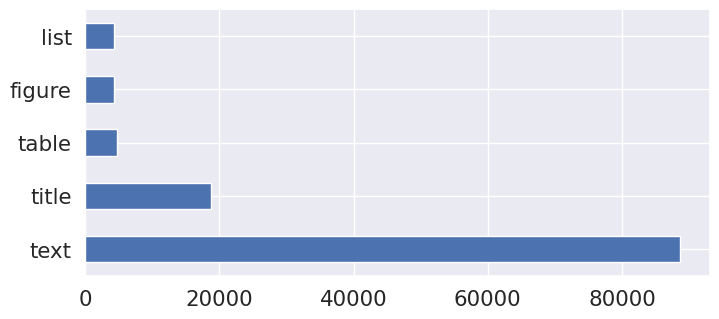

In [ ]:
category.value_counts().plot(kind='barh')


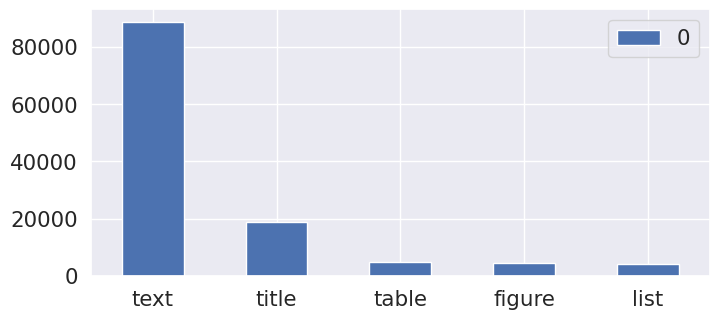

In [ ]:
df = pd.DataFrame(category.value_counts())
ax = df.plot.bar(rot=0)

(Text(0.5, 1.08, 'Instance Class Distribution (Validation set)'),)

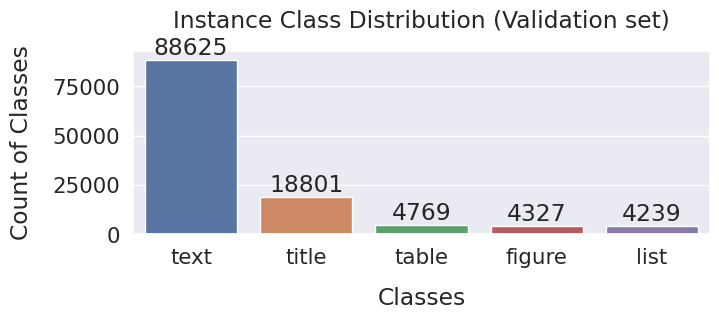

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)

ax =sns.barplot(x=category.value_counts().index, y=category.value_counts())
plt.ylabel("Count of Classes", labelpad=14)
plt.xlabel("Classes", labelpad=14)
plt.ticklabel_format(style='plain', axis='y')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])

plt.title('Instance Class Distribution (Validation set)', y=1.08),

In [ ]:
area  = []
area_to_id = {}
data_annotations=[]

for i in data['annotations']:
    area.append(i['area'] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# area

In [ ]:
len(area)

120761

In [ ]:
import seaborn as sns
import pandas as pd
bins = [ 0, 32*32, 92*92, 10000000 ]
df = pd.DataFrame(area, columns=['area'])

df['area'] = pd.cut(df['area'] , bins=bins, include_lowest=True)
# plt.hist(df['bin_cut_manual'])
plt.show()

# penguins = sns.load_dataset(area)
# sns.displot(area, bins=[0,32*32, 92*92,100000000],include_lowest=True)

In [ ]:
# bins = [ 0, 10, 50, 100 ]
# df['bin_cut_manual'] = pd.cut(df['area'] , bins=bins, labels=labels, include_lowest=True)
# plt.hist(df['bin_cut_manual'], bins=3)
# plt.show()

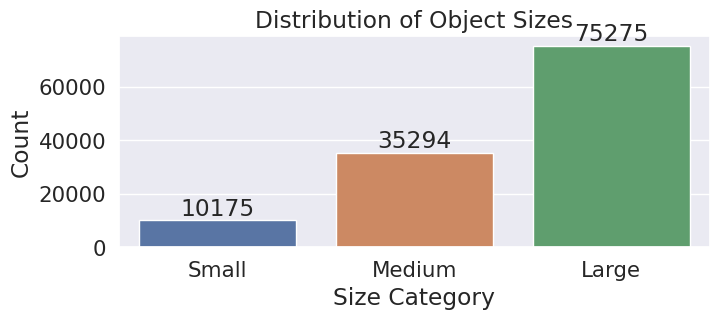

In [ ]:
# Define the size categories
bins = [0, 32*32, 92*92, float('inf')]
labels = ['Small', 'Medium', 'Large']

df = pd.DataFrame(area, columns=['area'])

# Categorize the sizes using pd.cut()
df['area'] = pd.cut(df['area'], bins=bins, labels=labels)


# Create a countplot using Seaborn
ax =sns.barplot(x=df['area'].value_counts().index, y=df['area'].value_counts())


# Set the plot title and labels
plt.title('Distribution of Object Sizes')
plt.xlabel('Size Category')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])


# Show the plot
plt.show()

In [ ]:
df['area'].value_counts()

Large     75275
Medium    35294
Small     10175
Name: area, dtype: int64

Datasets are accessible directly over the web. However, you can also store them locally, in network file systems, or in any object store.

In [ ]:
urls =  "https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/labels.tar.gz"
# urls =  "https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/publaynet.tar.gz"
# urls =  "https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/train-0.tar.gz"

Datasets are just `.tar` archives containing training files. For PubLayNet, each training sample consists of a `.png` file and a corresponding `.json` file.

In [ ]:
!curl {urls} | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313M  100  313M    0     0  14.8M      0  0:00:21  0:00:21 --:--:-- 14.9M


In [ ]:
# Converting it to dataframe for better visualization of data
import json
# f = open('/content/publaynet/train.json',)
# f = open('/content/publaynet/val.json',)

f = open('examples/samples.json',)

# thing_classes  = []
# category_name_to_id = {}
# id_to_category_name ={}
# data_annotations=[]
dict = json.load(f)
# for i in data['categories']:
#     thing_classes.append(i['name'])
#     print(i)
    # category_name_to_id[i['name']]=i['id']
    # id_to_category_name.append(i['id'])
    # id_to_category_name[i['id']= i['name']]
f.close()


from pandas import json_normalize
df = json_normalize(dict['annotations']) 

# Convert JSON to DataFrame Using read_json()
# df2 = pd.read_json(jsonStr, orient ='index')

# Use pandas.DataFrame.from_dict() to Convert JSON to DataFrame
# dict= json.loads(data)
# df2 = pd.DataFrame.from_dict(dict, orient="index")

In [ ]:
df.head()

segmentation          area  iscrowd  \
0  [[37.59, 360.34, 288.66, 360.34, 288.66, 370.3...  10218.471182        0   
1  [[50.06, 433.64, 288.65, 433.64, 288.65, 443.5...   4951.158655        0   
2  [[319.07, 381.37, 557.61, 381.37, 557.61, 391....   7997.937732        0   
3  [[319.07, 423.21, 557.62, 423.21, 557.62, 433....  37317.444555        0   
4  [[319.07, 611.48, 557.65, 611.48, 557.65, 621....  16596.676706        0   

   image_id                             bbox  category_id       id  
0    346767   [37.59, 360.34, 251.07, 41.36]            1  3377124  
1    346767   [37.59, 433.64, 251.07, 20.38]            1  3377125  
2    346767   [306.6, 381.37, 251.06, 41.24]            1  3377126  
3    346767  [306.6, 423.21, 251.07, 156.33]            1  3377127  
4    346767   [306.6, 611.48, 251.07, 72.65]            1  3377128

In [ ]:
# dict['annotations']

In [ ]:
df["area"].head()

0    10218.471182
1     4951.158655
2     7997.937732
3    37317.444555
4    16596.676706
Name: area, dtype: float64

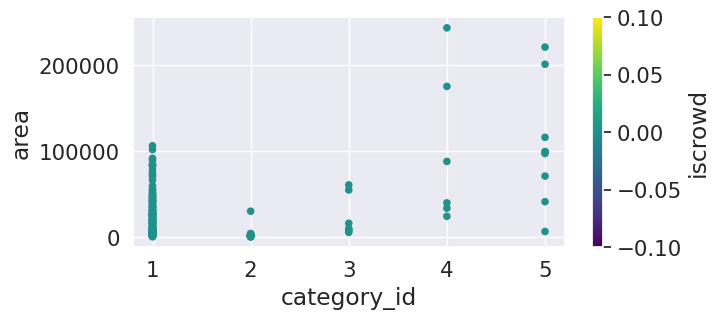

In [ ]:
ax2 = df.plot.scatter(x='category_id',
                      y='area',
                      c='iscrowd',
                      colormap='viridis')

In [ ]:
# g = sns.df(tips, col="area", hue="smoker")
# g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
# g.add_legend()

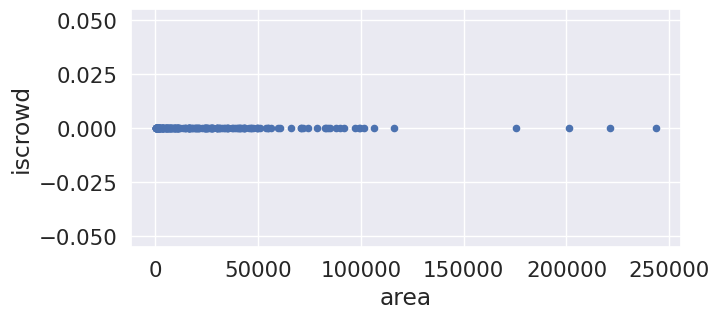

In [ ]:
ax2 = df.plot.scatter(x='area',
                      y='iscrowd'
                      # , c='species'
                      # , colormap='viridis'
                      )

In [ ]:
df

segmentation          area  iscrowd  \
0    [[37.59, 360.34, 288.66, 360.34, 288.66, 370.3...  10218.471182        0   
1    [[50.06, 433.64, 288.65, 433.64, 288.65, 443.5...   4951.158655        0   
2    [[319.07, 381.37, 557.61, 381.37, 557.61, 391....   7997.937732        0   
3    [[319.07, 423.21, 557.62, 423.21, 557.62, 433....  37317.444555        0   
4    [[319.07, 611.48, 557.65, 611.48, 557.65, 621....  16596.676706        0   
..                                                 ...           ...      ...   
188  [[62.36, 724.13, 164.11, 724.13, 164.11, 735.2...   3706.848612        0   
189  [[62.36, 200.14, 542.58, 200.14, 542.58, 217.1...  16481.756883        0   
190  [[62.36, 124.99, 459.32, 124.99, 459.32, 146.5...  30054.264300        0   
191  [[62.36, 505.3, 122.6, 505.3, 122.6, 519.3, 62...    843.360000        0   
192  [[62.36, 761.33, 273.66, 761.33, 273.66, 772.4...   3319.260000        0   

     image_id                             bbox  category_id       id  
0      346767   [37.59, 360.34, 251.07, 41.36]            1  3377124  
1      346767   [37.59, 433.64, 251.07, 20.38]            1  3377125  
2      346767   [306.6, 381.37, 251.06, 41.24]            1  3377126  
3      346767  [306.6, 423.21, 251.07, 156.33]            1  3377127  
4      346767   [306.6, 611.48, 251.07, 72.65]            1  3377128  
..        ...                              ...          ...      ...  
188    354610    [62.36, 724.13, 109.8, 36.03]            1  3453687  
189    354610   [62.36, 200.14, 480.22, 45.78]            1  3453688  
190    354610   [62.36, 124.99, 478.96, 68.31]            2  3453689  
191    354610      [62.36, 505.3, 60.24, 14.0]            2  3453690  
192    354610   [62.36, 761.33, 211.29, 20.76]            1  4197090  

[193 rows x 7 columns]

In [ ]:
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'index'})

In [ ]:
df

index                                       segmentation          area  \
0        0  [[37.59, 360.34, 288.66, 360.34, 288.66, 370.3...  10218.471182   
1        1  [[50.06, 433.64, 288.65, 433.64, 288.65, 443.5...   4951.158655   
2        2  [[319.07, 381.37, 557.61, 381.37, 557.61, 391....   7997.937732   
3        3  [[319.07, 423.21, 557.62, 423.21, 557.62, 433....  37317.444555   
4        4  [[319.07, 611.48, 557.65, 611.48, 557.65, 621....  16596.676706   
..     ...                                                ...           ...   
188    188  [[62.36, 724.13, 164.11, 724.13, 164.11, 735.2...   3706.848612   
189    189  [[62.36, 200.14, 542.58, 200.14, 542.58, 217.1...  16481.756883   
190    190  [[62.36, 124.99, 459.32, 124.99, 459.32, 146.5...  30054.264300   
191    191  [[62.36, 505.3, 122.6, 505.3, 122.6, 519.3, 62...    843.360000   
192    192  [[62.36, 761.33, 273.66, 761.33, 273.66, 772.4...   3319.260000   

     iscrowd  image_id                             bbox  category_id       id  
0          0    346767   [37.59, 360.34, 251.07, 41.36]            1  3377124  
1          0    346767   [37.59, 433.64, 251.07, 20.38]            1  3377125  
2          0    346767   [306.6, 381.37, 251.06, 41.24]            1  3377126  
3          0    346767  [306.6, 423.21, 251.07, 156.33]            1  3377127  
4          0    346767   [306.6, 611.48, 251.07, 72.65]            1  3377128  
..       ...       ...                              ...          ...      ...  
188        0    354610    [62.36, 724.13, 109.8, 36.03]            1  3453687  
189        0    354610   [62.36, 200.14, 480.22, 45.78]            1  3453688  
190        0    354610   [62.36, 124.99, 478.96, 68.31]            2  3453689  
191        0    354610      [62.36, 505.3, 60.24, 14.0]            2  3453690  
192        0    354610   [62.36, 761.33, 211.29, 20.76]            1  4197090  

[193 rows x 8 columns]

In [ ]:
# df['category']= df['category_id'].replace({1:'Text',2:'Title',3:'List',4:'Table',5:'Figure'})


In [ ]:
df['category']= df['category_id'].replace(id_to_category_name)


In [ ]:
df['category']

0       text
1       text
2       text
3       text
4       text
       ...  
188     text
189     text
190    title
191    title
192     text
Name: category, Length: 193, dtype: object

In [ ]:
df

index                                       segmentation          area  \
0        0  [[37.59, 360.34, 288.66, 360.34, 288.66, 370.3...  10218.471182   
1        1  [[50.06, 433.64, 288.65, 433.64, 288.65, 443.5...   4951.158655   
2        2  [[319.07, 381.37, 557.61, 381.37, 557.61, 391....   7997.937732   
3        3  [[319.07, 423.21, 557.62, 423.21, 557.62, 433....  37317.444555   
4        4  [[319.07, 611.48, 557.65, 611.48, 557.65, 621....  16596.676706   
..     ...                                                ...           ...   
188    188  [[62.36, 724.13, 164.11, 724.13, 164.11, 735.2...   3706.848612   
189    189  [[62.36, 200.14, 542.58, 200.14, 542.58, 217.1...  16481.756883   
190    190  [[62.36, 124.99, 459.32, 124.99, 459.32, 146.5...  30054.264300   
191    191  [[62.36, 505.3, 122.6, 505.3, 122.6, 519.3, 62...    843.360000   
192    192  [[62.36, 761.33, 273.66, 761.33, 273.66, 772.4...   3319.260000   

     iscrowd  image_id                             bbox  category_id       id  \
0          0    346767   [37.59, 360.34, 251.07, 41.36]            1  3377124   
1          0    346767   [37.59, 433.64, 251.07, 20.38]            1  3377125   
2          0    346767   [306.6, 381.37, 251.06, 41.24]            1  3377126   
3          0    346767  [306.6, 423.21, 251.07, 156.33]            1  3377127   
4          0    346767   [306.6, 611.48, 251.07, 72.65]            1  3377128   
..       ...       ...                              ...          ...      ...   
188        0    354610    [62.36, 724.13, 109.8, 36.03]            1  3453687   
189        0    354610   [62.36, 200.14, 480.22, 45.78]            1  3453688   
190        0    354610   [62.36, 124.99, 478.96, 68.31]            2  3453689   
191        0    354610      [62.36, 505.3, 60.24, 14.0]            2  3453690   
192        0    354610   [62.36, 761.33, 211.29, 20.76]            1  4197090   

    category  
0       text  
1       text  
2       text  
3       text  
4       text  
..       ...  
188     text  
189     text  
190    title  
191    title  
192     text  

[193 rows x 9 columns]

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


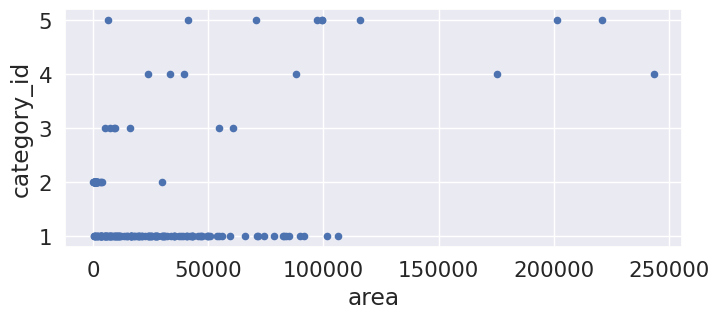

In [ ]:
ax2 = df.plot.scatter(x='area',
                      y='category_id'
                      # , c='category'
                      , colormap='viridis'
                      )

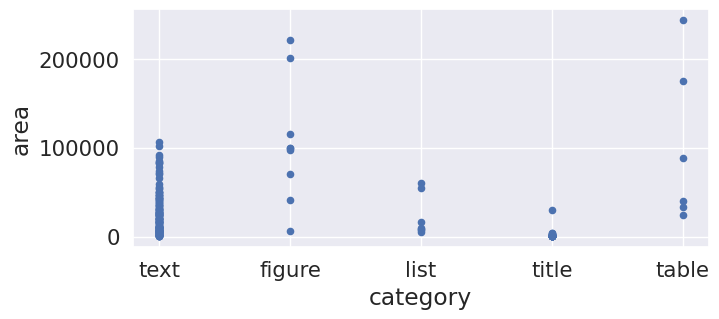

In [ ]:
ax2 = df.plot.scatter(y='area',
                      x='category'
                      # , c='category'
                      , colormap='viridis'
                      )

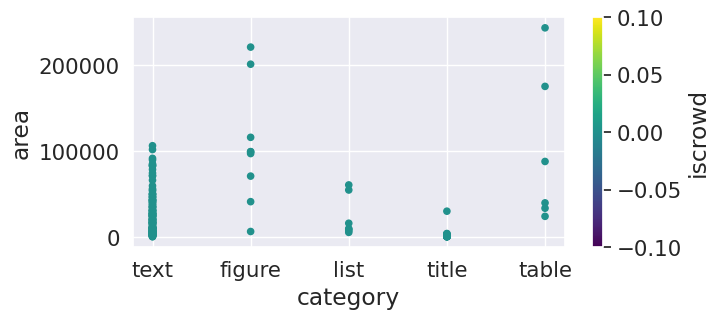

In [ ]:
ax2 = df.plot.scatter(x='category',
                      y='area',
                      c='iscrowd',
                      colormap='viridis')

In [ ]:
print(category_name_to_id)
print(id_to_category_name)


{}
{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}


In [ ]:
df.image_id.value_counts().head()

419293    26
385295    14
402032    14
379698    13
407967    12
Name: image_id, dtype: int64

In [ ]:
# Number of images in each pages
df2 = df.pivot_table(index = ['image_id'], aggfunc ='size')
df2.head()

image_id
346767    12
347190     5
348952    10
353156     6
354610    12
dtype: int64

In [ ]:
df3 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='size')
(df3).head()

image_id  category
346767    figure      1
          list        1
          text        7
          title       3
347190    figure      1
dtype: int64

In [ ]:
df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum')
(df4).head()

<ipython-input-671-cca18357adbf>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum')


area  category_id        id  index  iscrowd
image_id category                                                      
346767   figure     99400.438698            5   3377131      7        0
         list       54728.437378            3   3377132      8        0
         text       99645.711030            7  23639889     21        0
         title       3302.564074            6  10131402     30        0
347190   figure    116058.091968            5   3382160     16        0

In [ ]:
df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='count')
# df4.drop('id')
df4.head()

area  bbox  category_id  id  index  iscrowd  segmentation
image_id category                                                           
346767   figure       1     1            1   1      1        1             1
         list         1     1            1   1      1        1             1
         text         7     7            7   7      7        7             7
         title        3     3            3   3      3        3             3
347190   figure       1     1            1   1      1        1             1

In [ ]:
df5 = df.pivot_table(index = ['category_id', 'category'], aggfunc ='sum')
df5.head()


<ipython-input-669-66d223698b2c>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['category_id', 'category'], aggfunc ='sum')


area         id  image_id  index  iscrowd
category_id category                                                   
1           text      3.641272e+06  513020924  52486040  13040        0
2           title     7.283180e+04  128060828  13114458   3635        0
3           list      1.627129e+05   25464502   2610875    440        0
4           table     6.042008e+05   23457613   2401866    750        0
5           figure    9.526877e+05   33191582   3403074    663        0

In [ ]:
df.head()

index                                       segmentation          area  \
0      0  [[37.59, 360.34, 288.66, 360.34, 288.66, 370.3...  10218.471182   
1      1  [[50.06, 433.64, 288.65, 433.64, 288.65, 443.5...   4951.158655   
2      2  [[319.07, 381.37, 557.61, 381.37, 557.61, 391....   7997.937732   
3      3  [[319.07, 423.21, 557.62, 423.21, 557.62, 433....  37317.444555   
4      4  [[319.07, 611.48, 557.65, 611.48, 557.65, 621....  16596.676706   

   iscrowd  image_id                             bbox  category_id       id  \
0        0    346767   [37.59, 360.34, 251.07, 41.36]            1  3377124   
1        0    346767   [37.59, 433.64, 251.07, 20.38]            1  3377125   
2        0    346767   [306.6, 381.37, 251.06, 41.24]            1  3377126   
3        0    346767  [306.6, 423.21, 251.07, 156.33]            1  3377127   
4        0    346767   [306.6, 611.48, 251.07, 72.65]            1  3377128   

  category  
0     text  
1     text  
2     text  
3     text  
4     text

In [ ]:
df.pivot(index=['index']
, columns='category'
, values='area'
).replace(np.nan, 0).head()

category  figure  list  table          text  title
index                                             
0            0.0   0.0    0.0  10218.471182    0.0
1            0.0   0.0    0.0   4951.158655    0.0
2            0.0   0.0    0.0   7997.937732    0.0
3            0.0   0.0    0.0  37317.444555    0.0
4            0.0   0.0    0.0  16596.676706    0.0

In [ ]:
df.pivot(index=['id']
, columns='category'
, values='area'
).replace(np.nan, 0).head()

category  figure  list  table          text  title
id                                                
3377124      0.0   0.0    0.0  10218.471182    0.0
3377125      0.0   0.0    0.0   4951.158655    0.0
3377126      0.0   0.0    0.0   7997.937732    0.0
3377127      0.0   0.0    0.0  37317.444555    0.0
3377128      0.0   0.0    0.0  16596.676706    0.0

In [ ]:
df5 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum').replace(np.nan, 0)
(df5).drop(["iscrowd", "index","category_id","id"], axis = 1).head()



<ipython-input-665-4c79a557a2c1>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum').replace(np.nan, 0)


area
image_id category               
346767   figure     99400.438698
         list       54728.437378
         text       99645.711030
         title       3302.564074
347190   figure    116058.091968

In [ ]:
df5 = df.pivot_table(index = ['image_id'],columns='category', aggfunc ='sum').replace(np.nan, 0)
df5.drop(["iscrowd", "index","category_id","id"], axis = 1)


<ipython-input-634-0a6423c93f4a>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['image_id'],columns='category', aggfunc ='sum').replace(np.nan, 0)


area                                              \
category         figure          list          table           text   
image_id                                                              
346767     99400.438698  54728.437378       0.000000   99645.711030   
347190    116058.091968      0.000000       0.000000  190686.511466   
348952         0.000000  60618.886367       0.000000  134663.169123   
353156         0.000000      0.000000  243535.655349   64437.739516   
354610         0.000000      0.000000       0.000000  215430.856779   
355338         0.000000      0.000000       0.000000  293377.178596   
356966         0.000000      0.000000       0.000000  266978.897751   
365548    207616.005298      0.000000       0.000000   62127.640343   
379698     99284.388866   5384.243399       0.000000  190432.708077   
382434         0.000000  25094.187377       0.000000  260686.863451   
384435         0.000000      0.000000       0.000000  264520.077018   
385295     97148.820767  16887.114848       0.000000  133143.769669   
393872     70908.724800      0.000000       0.000000  184183.668427   
394744         0.000000      0.000000       0.000000  245332.346671   
402032     41146.952883      0.000000   57603.083646  181845.969263   
405276         0.000000      0.000000       0.000000  290051.409819   
407967         0.000000      0.000000   87954.737982  201339.419868   
417124    221124.285604      0.000000       0.000000   42973.586893   
417386         0.000000      0.000000  175377.088080  125161.871806   
419293         0.000000      0.000000   39730.281290  194253.031118   

                        
category         title  
image_id                
346767     3302.564074  
347190        0.000000  
348952     2164.435412  
353156        0.000000  
354610    30897.624300  
355338      993.842418  
356966     2194.766784  
365548      593.881741  
379698      958.873633  
382434        0.000000  
384435     3549.394823  
385295     5987.119224  
393872     1680.309620  
394744    10400.244624  
402032      864.360861  
405276     3122.133836  
407967      915.019091  
417124        0.000000  
417386        0.000000  
419293     5207.230657

In [ ]:
df


index                                       segmentation          area  \
0        0  [[37.59, 360.34, 288.66, 360.34, 288.66, 370.3...  10218.471182   
1        1  [[50.06, 433.64, 288.65, 433.64, 288.65, 443.5...   4951.158655   
2        2  [[319.07, 381.37, 557.61, 381.37, 557.61, 391....   7997.937732   
3        3  [[319.07, 423.21, 557.62, 423.21, 557.62, 433....  37317.444555   
4        4  [[319.07, 611.48, 557.65, 611.48, 557.65, 621....  16596.676706   
..     ...                                                ...           ...   
188    188  [[62.36, 724.13, 164.11, 724.13, 164.11, 735.2...   3706.848612   
189    189  [[62.36, 200.14, 542.58, 200.14, 542.58, 217.1...  16481.756883   
190    190  [[62.36, 124.99, 459.32, 124.99, 459.32, 146.5...  30054.264300   
191    191  [[62.36, 505.3, 122.6, 505.3, 122.6, 519.3, 62...    843.360000   
192    192  [[62.36, 761.33, 273.66, 761.33, 273.66, 772.4...   3319.260000   

     iscrowd  image_id                             bbox  category_id       id  \
0          0    346767   [37.59, 360.34, 251.07, 41.36]            1  3377124   
1          0    346767   [37.59, 433.64, 251.07, 20.38]            1  3377125   
2          0    346767   [306.6, 381.37, 251.06, 41.24]            1  3377126   
3          0    346767  [306.6, 423.21, 251.07, 156.33]            1  3377127   
4          0    346767   [306.6, 611.48, 251.07, 72.65]            1  3377128   
..       ...       ...                              ...          ...      ...   
188        0    354610    [62.36, 724.13, 109.8, 36.03]            1  3453687   
189        0    354610   [62.36, 200.14, 480.22, 45.78]            1  3453688   
190        0    354610   [62.36, 124.99, 478.96, 68.31]            2  3453689   
191        0    354610      [62.36, 505.3, 60.24, 14.0]            2  3453690   
192        0    354610   [62.36, 761.33, 211.29, 20.76]            1  4197090   

    category  
0       text  
1       text  
2       text  
3       text  
4       text  
..       ...  
188     text  
189     text  
190    title  
191    title  
192     text  

[193 rows x 9 columns]

In [ ]:
df6 = pd.DataFrame(df[['area','category']])
df6

area category
0    10218.471182     text
1     4951.158655     text
2     7997.937732     text
3    37317.444555     text
4    16596.676706     text
..            ...      ...
188   3706.848612     text
189  16481.756883     text
190  30054.264300    title
191    843.360000    title
192   3319.260000     text

[193 rows x 2 columns]

In [ ]:
df5=df6.copy()

In [ ]:
df6['category'].value_counts()

text      137
title      34
figure      9
list        7
table       6
Name: category, dtype: int64

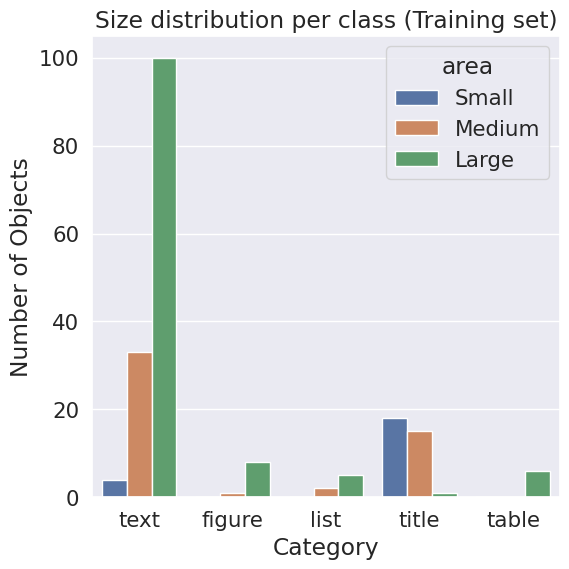

In [ ]:
# Define the size categories
bins = [0, 32*32, 92*92, float('inf')]
labels = ['Small', 'Medium', 'Large']

# Categorize the sizes using pd.cut()
df6['area'] = pd.cut(df6['area'], bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(6, 6))

# Create a countplot using Seaborn
ax =sns.countplot(data=df6, x="category", hue="area")


# Set the plot title and labels
plt.title('Size distribution per class (Training set)')
plt.xlabel('Category')
plt.ylabel('Number of Objects')
# ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])


# Show the plot
plt.show()

In [ ]:
df6

area category
0     Large     text
1    Medium     text
2    Medium     text
3     Large     text
4     Large     text
..      ...      ...
188  Medium     text
189   Large     text
190   Large    title
191   Small    title
192  Medium     text

[193 rows x 2 columns]

In [ ]:
df6["area"].value_counts()

Large     120
Medium     51
Small      22
Name: area, dtype: int64

In [ ]:
df5

area category
0    10218.471182     text
1     4951.158655     text
2     7997.937732     text
3    37317.444555     text
4    16596.676706     text
..            ...      ...
188   3706.848612     text
189  16481.756883     text
190  30054.264300    title
191    843.360000    title
192   3319.260000     text

[193 rows x 2 columns]

In [ ]:
df5

area category
0    10218.471182     text
1     4951.158655     text
2     7997.937732     text
3    37317.444555     text
4    16596.676706     text
..            ...      ...
188   3706.848612     text
189  16481.756883     text
190  30054.264300    title
191    843.360000    title
192   3319.260000     text

[193 rows x 2 columns]

In [ ]:
df5

area category
0    10218.471182     text
1     4951.158655     text
2     7997.937732     text
3    37317.444555     text
4    16596.676706     text
..            ...      ...
188   3706.848612     text
189  16481.756883     text
190  30054.264300    title
191    843.360000    title
192   3319.260000     text

[193 rows x 2 columns]

In [ ]:
df7 = df5.pivot_table(index = ['category'], aggfunc ='sum')
df7

area
category              
figure    9.526877e+05
list      1.627129e+05
table     6.042008e+05
text      3.641272e+06
title     7.283180e+04

<Axes: xlabel='area', ylabel='count'>

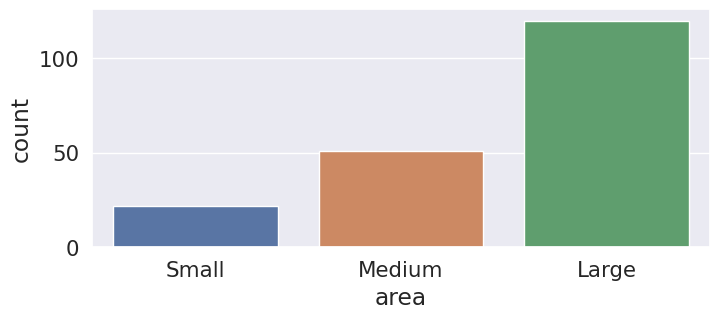

In [ ]:
sns.countplot(x=df6["area"])


<Axes: xlabel='category', ylabel='count'>

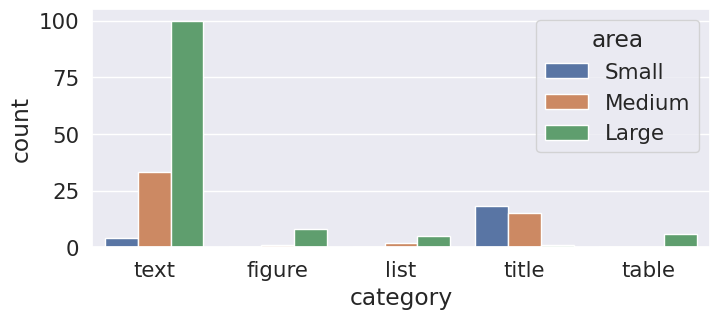

In [ ]:
sns.countplot(data=df6, x="category", hue="area")


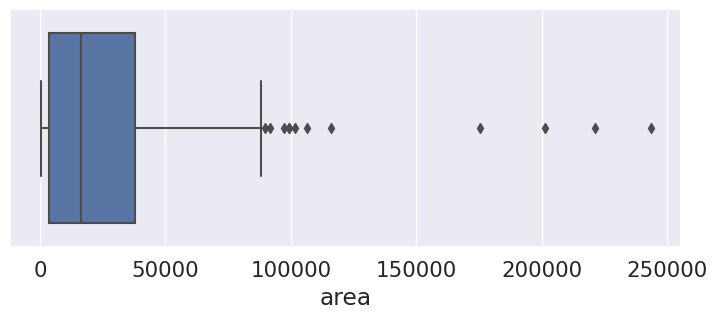

In [ ]:
# setting the dimensions of the plot
# drawing the box plot
sns.boxplot(x = df['area'])
plt.show()


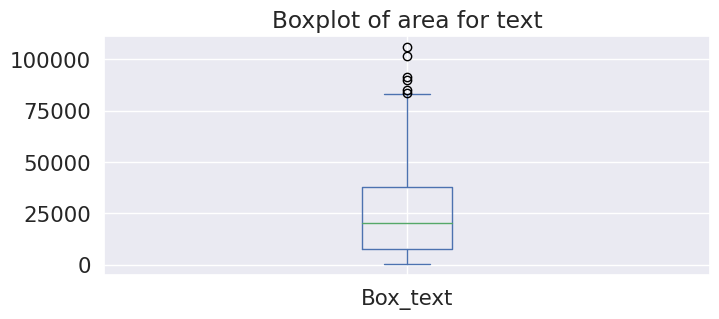

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_text": df.area[df.category_id==1].to_list()})

# Plot the dataframe
ax = data[['Box_text']].plot(kind='box', title='Boxplot of area for text')

# Display the plot
plt.show()

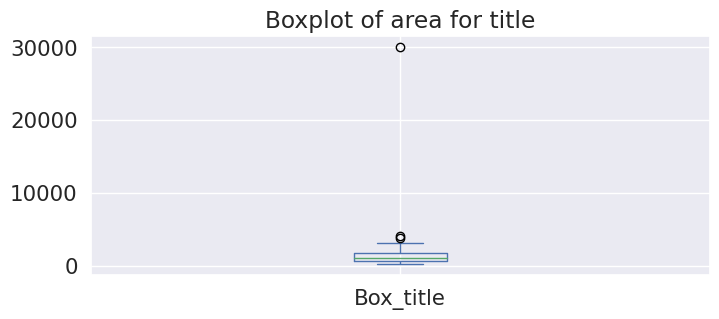

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_title": df.area[df.category_id==2].to_list()})

# Plot the dataframe
ax = data[['Box_title']].plot(kind='box', title='Boxplot of area for title')

# Display the plot
plt.show()

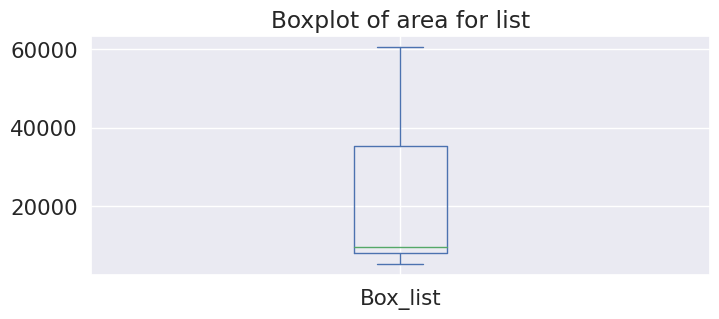

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_list": df.area[df.category_id==3].to_list()})

# Plot the dataframe
ax = data[['Box_list']].plot(kind='box', title='Boxplot of area for list')

# Display the plot
plt.show()

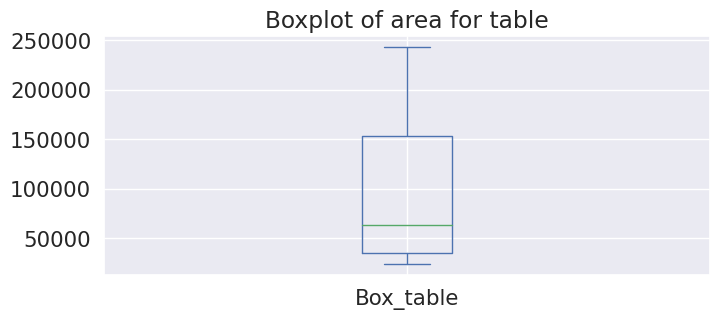

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_table": df.area[df.category_id==4].to_list()})

# Plot the dataframe
ax = data[['Box_table']].plot(kind='box', title='Boxplot of area for table')

# Display the plot
plt.show()

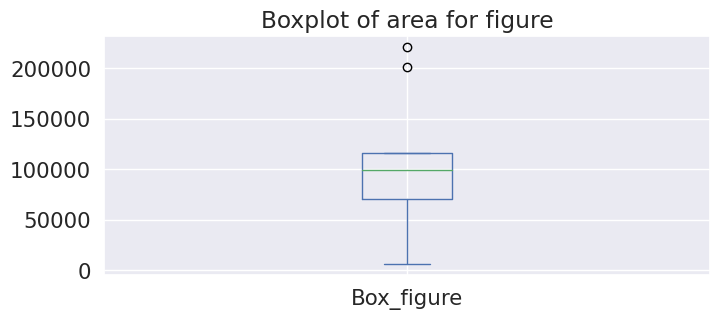

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_figure": df.area[df.category_id==5].to_list()})

# Plot the dataframe
ax = data[['Box_figure']].plot(kind='box', title='Boxplot of area for figure')

# Display the plot
plt.show()